In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import sympy
import pandas as pd

In [2]:
# from sympy.parsing.sympy_parser import parse_expr
# from sympy import plot_implicit, cos, sin, symbols, Eq, And, Union, Or
# # ezplot = lambda exper: plot_implicit(And(parse_expr(exper)))#用了匿名函数

In [3]:
# expression='x**2+y**2 - 1' #隐函数是x**2+y**2-1=0，其实就是圆的方程
# ezplot(expression)#能描绘大致的图像

In [4]:
# r = np.arange(0,22,1)
# theta = np.arange(0, 2*np.pi, 0.2*np.pi)
# R, Theta = np.meshgrid(r, theta)
# a = R*np.cos(Theta)
# a = a.flatten()
# b = R*np.sin(Theta)
# b = b.flatten()
# x, y = symbols('x y')
# expr = []
# for i in range(len(a)):
#     x0 = a[i];
#     y0 = b[i]
#     expr.append((x-x0)**2 + (y-y0)**2 - 120**2 <= 0)

In [5]:
# E = And(Or(*expr),y-90<0)
# plot_implicit(And(y-90>0,Or(*expr)),(x,-150,150),(y,-150,150))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)


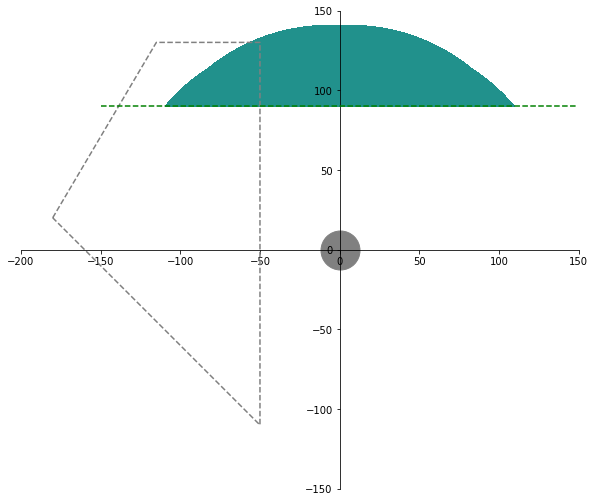

In [27]:
# %matplotlib inline
fig = plt.figure(1,figsize=(10,10)) 
ax = fig.add_subplot(111, aspect='equal') 

# plt.rcParams['image.cmap'] = 'viridis'

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
R_i = 22 # 海岛领空
r = np.arange(0,R_i,0.2)
theta = np.arange(0, 2.02*np.pi, 0.2*np.pi)
R, Theta = np.meshgrid(r, theta, sparse=True)
x0 = R*np.cos(Theta)
y0 = R*np.sin(Theta)

x0 = list(x0.flatten())
y0 = list(y0.flatten())

x = np.arange(-150,150,1)
y = np.arange(90,150,1)

# draw a curve
line, = ax.plot(x,[90]*len(x),'--',color='g',zorder=100)

# draw a contour
X,Y=np.meshgrid(x,y)
for (xx,yy) in zip(x0,y0):
    
    F=(X-xx)**2
    G=(Y-yy)**2
    Z = F+G

#     mask = np.zeros_like(Z, dtype=bool)
#     mask[Y<90] =True
#     Z = np.ma.array(Z, mask=mask)
    ax.contourf(X,Y,Z,[0,14400], cmp=cm.viridis)

## draw T area
x = [-180,-115,-50,-50,-180]
y = [20, 130,130,-110,20]
ax.plot(x,y, '--',color='gray')

# draw island O
ax.scatter(0,0,s=1520,color='gray')

ax.set_xlim(-200, 150)
ax.set_ylim(-150, 150)
fig.savefig('1-1.png',dpi=320)

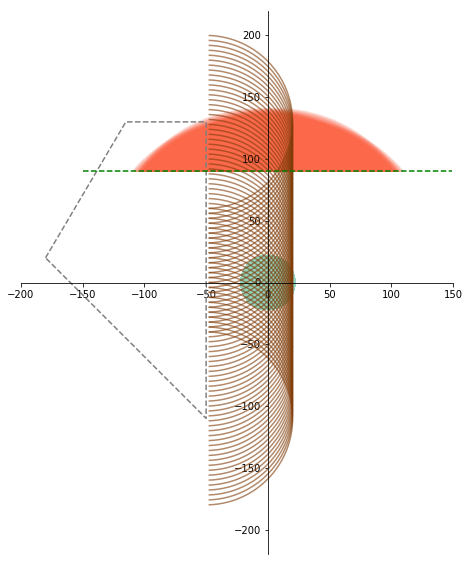

In [48]:
fig = plt.figure(1,figsize=(10,10)) 
ax = fig.add_subplot(111, aspect='equal') 

# plt.rcParams['image.cmap'] = 'viridis'

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
R_i = 22.22 # 海岛领空
r = np.arange(0,R_i,0.2)
theta = np.arange(0, 2.02*np.pi, 0.2*np.pi)
R, Theta = np.meshgrid(r, theta, sparse=True)
x0 = R*np.cos(Theta)
y0 = R*np.sin(Theta)

x0 = list(x0.flatten())
y0 = list(y0.flatten())

x = np.arange(-150,150,1)
y = np.arange(90,150,1)

# draw a curve
line, = ax.plot(x,[90]*len(x),'--',color='g',zorder=100)

# draw a contour
X,Y=np.meshgrid(x,y)
for (xx,yy) in zip(x0,y0):
    
    F=(X-xx)**2
    G=(Y-yy)**2
    Z = F+G

#     mask = np.zeros_like(Z, dtype=bool)
#     mask[Y<90] =True
#     Z = np.ma.array(Z, mask=mask)
    plt.contourf(X,Y,Z,[0,14400], cmap=cm.Reds, alpha=0.05)

## draw T area
x = [-180,-115,-50,-50,-180]
y = [20, 130,130,-110,20]
ax.plot(x,y, '--',color='gray')

# draw island O
x = y = np.arange(-55,55,1)
X,Y = np.meshgrid(x,y)
D0 = X**2+Y**2
plt.contourf(X,Y,D0,[0,R_i**2],cmap=cm.BuGn, alpha=0.7)

ax.set_xlim(-200, 150)
ax.set_ylim(-220, 220)


# Draw a contour of plane
y0 = np.arange(-110,131,4)
x0 = np.array([-50]*len(y0))
X0,Y0 = np.meshgrid(x0,y0, sparse=True)

X0 = list(X0.flatten())
Y0 = list(Y0.flatten())

x = np.arange(-60,70,4)
y = np.arange(-180,210,4)
X,Y=np.meshgrid(x,y)
for (xx, yy) in zip(X0,Y0):
    F=(X-xx)**2
    G=(Y-yy)**2
    Z = F+G

    mask = np.zeros_like(Z, dtype=bool)
    mask[X<-50] = True
    Z = np.ma.array(Z, mask=mask)
    plt.contour(X,Y,Z,[4900], cmap=cm.PuOr, alpha=0.6)

fig.savefig('1-2.png',dpi=320)

考虑敌机躲避情况

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


[] []


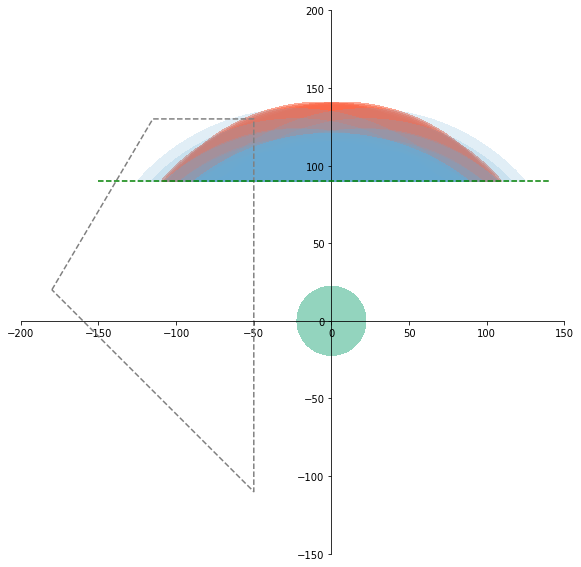

In [41]:
%matplotlib inline
fig = plt.figure(1,figsize=(10,10)) 
ax = fig.add_subplot(111, aspect='equal') 

# plt.rcParams['image.cmap'] = 'viridis'

# set up axis 
ax.spines['left'].set_position('zero') 
ax.spines['right'].set_color('none') 
ax.spines['bottom'].set_position('zero') 
ax.spines['top'].set_color('none') 
ax.xaxis.set_ticks_position('bottom') 
ax.yaxis.set_ticks_position('left') 

# setup x and y ranges and precision
R_i = 22.22 # 海岛领空
r = np.arange(0,R_i,1)
theta = np.arange(0, 2.02*np.pi, 0.2*np.pi)
R, Theta = np.meshgrid(r, theta, sparse=True)
x_c = R*np.cos(Theta)
y_c = R*np.sin(Theta)

x_c = list(x_c.flatten())
y_c = list(y_c.flatten())

x = np.arange(-150,150,10)
y = np.arange(90,190,10)

# draw a curve
line, = ax.plot(x,[90]*len(x),'--',color='g',zorder=100)

# draw a contour
X,Y=np.meshgrid(x,y)
for (xc,yc) in zip(x_c,y_c):
    
    F=(X - xc)**2
    G=(Y - yc)**2
    Z = F+G
    
#     mask = np.zeros_like(Z, dtype=bool)
#     mask[Y<90] =True
#     Z = np.ma.array(Z, mask=mask)
    plt.contourf(X,Y,Z,[0,14400],cmap=cm.Reds, alpha=.6)
    
# setup x and y ranges and precision
r = np.arange(0,22,1)
theta = np.arange(np.pi, 2.02*np.pi, 0.2*np.pi)
R, Theta = np.meshgrid(r, theta, sparse=True)
x_c = R*np.cos(Theta)
y_c = R*np.sin(Theta)

# calculate cordinate
r_c = np.sqrt(x_c**2 + y_c**2)
x_d = R_i * x_c / r_c
y_d = R_i * y_c / r_c

x_d[np.isnan(x_d)] = 0
y_d[np.isnan(y_d)] = -R_i

# calculate distance of CD
cd = np.sqrt((x_c - x_d)**2 + (y_c - y_d)**2)
eta = (1.3/0.202 * cd)**2

print(x_d[np.isnan(x_d)],y_d[np.isnan(y_d)])
x_c = list(x_c.flatten())
y_c = list(y_c.flatten())
x_d = list(x_d.flatten())
y_d = list(y_d.flatten())
eta = list(eta.flatten())

x = np.arange(-150,150,1)
y = np.arange(90,150,1)

# draw a contour
X,Y=np.meshgrid(x,y)
for (xd,yd, e) in zip(x_d,y_d,eta):
    Fd=(X - xd)**2
    Gd=(Y - yd)**2
    Zd = Fd+Gd
    
#     mask = np.zeros_like(Z, dtype=bool)
#     mask[Y<90] =True
#     Z = np.ma.array(Z, mask=mask)
    plt.contourf(X,Y,Zd,[0,e], cmap=cm.Blues, alpha=0.2)
    
## draw T area
x = [-180,-115,-50,-50,-180]
y = [20, 130,130,-110,20]
plt.plot(x,y, '--',color='gray')

# draw island O
x = y = np.arange(-55,55,1)
X,Y = np.meshgrid(x,y)
D0 = X**2+Y**2
plt.contourf(X,Y,D0,[0,R_i**2],cmap=cm.BuGn, alpha=0.7)

ax.set_xlim(-200, 150)
ax.set_ylim(-150, 200)
fig.savefig('1-3.png',dpi=320)